<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="carlogo.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=24px>
                    <b>Car Price Prediction
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

## Problem Statement
The prices of new cars in the industry is fixed by the manufacturer with some additional costs incurred by the Government in the form of taxes. So, customers buying a new car can be assured of the money they invest to be worthy. But due to the increased price of new cars and the incapability of customers to buy new cars due to the lack of funds, used cars sales are on a global increase. There is a need for a used car price prediction system to effectively determine the worthiness of the car using a variety of features. Even though there are websites that offers this service, their prediction method may not be the best. Besides, different models and systems may contribute on predicting power for a used car’s actual market value. It is important to know their actual market value while both buying and selling.

## Data Definition

**Model:**  The Brand and Model Name of the Car (Categoric)

**Selling Price:** The Price at Which the Car sells  (Numeric)

**Kilometer Driven:** Total kilometer driven by the previous owner (Numeric)

**Year**: The year of the model (Numeric)

**Owner:** 	Whether the ownership is Firsthand, Second hand or other (Categoric)

**Fuel Type:** The type of fuel used by the car (Categoric)

**Transmission:** The type of transmission used by the car (Categoric)

**Insurance:** If the car is Insured or Not (Categoric)

**Car Condition:** The present condition of the car  (Numeric)


**[Import The Required Libraries](#import_lib)** 
<a id='import_lib'></a>

## Table of Contents

1. **[Import The Required Libraries](#import_lib)** 
2. **[Read The Data](#RD)** 
3. **[Data PreProcessing](#DP)**
4. **[Exploratory Data Analysis](#EDA)** 
5. **[Removing outliers](#RO)** 
6. **[Checking Normality](#Norm)** 
7. **[Encoding Categorical Variables](#EN)** 
8. **[Feature Selection](#FS)** 
9. **[Scaling the data](#SC)** 
10. **[Multiple Linear Regression](#MLR)**  
     1. **[Model with target variable](#1)** 
     2. **[Using pvalue to remove insignificant variables](#2)** 
     3. **[Model with significant variables](#3)** 
     4. **[Detecting heteroscedasticity](#4)** 
     5. **[Full model with Significant Variables](#5)** 
     6. **[Model with interaction effect](#6)** 
11. **[Regularisation](#Reg)** 
     1. **[Ridge regression](#RR)** 
     2. **[Lasso regression](#LR)** 
     3. **[Elastic Net regression](#ENR)** 
12. **[Stochastic Gradient decent](#SGD)** 
     1. **[Linear Regression with SGD](#LRS)** 
     2. **[Linear Regression with SGD using GridSearchCV](#GSC)** 
13. **[Conclusion](#Conc)**

<a id='import_lib'></a>
## Import The Required Libraries 


In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodel to perform linear regression
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse

# import various functions from scipy
from scipy import stats
from scipy.stats import shapiro

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# 'SciPy' is used to perform scientific computations
from scipy.stats import f_oneway
from scipy.stats import jarque_bera
from scipy import stats

from sklearn.linear_model import LinearRegression

# import functions to perform feature selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE


# import functions to perform cross validation
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.preprocessing import LabelEncoder

# 'Scikit-learn' (sklearn) emphasizes various regression, classification and clustering algorithms
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

<a id='RD'></a>
# Read The Data

In [2]:
df = pd.read_csv("car_data_noon.csv")
df.head()

,Model,Selling Price,Kilometers Driven,Year,Owner,Fuel Type,Transmission,Insurance,Car Condition
0,Maruti WagonR1.0LXI,312165,82238,2014,First Owner,Petrol + CNG,MANUAL,Expired,4.200000
1,Toyota EtiosLiva,313799,30558,2013,First Owner,Petrol,MANUAL,12-09-2021,4.400000
2,Maruti Alto800,295999,22164,2018,First Owner,Petrol,MANUAL,01-12-2020,4.800000
3,Maruti Swift,435199,30535,2013,First Owner,Diesel,MANUAL,Comp,4.300000
4,Maruti WagonR1.0,289099,15738,2013,First Owner,Petrol,MANUAL,11-08-2021,4.300000


<a id='DP'></a>
# Data Preprocessing 

In [3]:
new=df.Model.str.split(expand=True,n=1)
cname=new[0]
df.insert(loc=0,column='Brand',value=cname)
df.head()

,Brand,Model,Selling Price,Kilometers Driven,Year,Owner,Fuel Type,Transmission,Insurance,Car Condition
0,Maruti,Maruti WagonR1.0LXI,312165,82238,2014,First Owner,Petrol + CNG,MANUAL,Expired,4.200000
1,Toyota,Toyota EtiosLiva,313799,30558,2013,First Owner,Petrol,MANUAL,12-09-2021,4.400000
2,Maruti,Maruti Alto800,295999,22164,2018,First Owner,Petrol,MANUAL,01-12-2020,4.800000
3,Maruti,Maruti Swift,435199,30535,2013,First Owner,Diesel,MANUAL,Comp,4.300000
4,Maruti,Maruti WagonR1.0,289099,15738,2013,First Owner,Petrol,MANUAL,11-08-2021,4.300000


In [4]:
df['age'] = 2021 - df['Year']
df.drop(columns = ['Year'],inplace=True)
df.head()

,Brand,Model,Selling Price,Kilometers Driven,Owner,Fuel Type,Transmission,Insurance,Car Condition,age
0,Maruti,Maruti WagonR1.0LXI,312165,82238,First Owner,Petrol + CNG,MANUAL,Expired,4.200000,7
1,Toyota,Toyota EtiosLiva,313799,30558,First Owner,Petrol,MANUAL,12-09-2021,4.400000,8
2,Maruti,Maruti Alto800,295999,22164,First Owner,Petrol,MANUAL,01-12-2020,4.800000,3
3,Maruti,Maruti Swift,435199,30535,First Owner,Diesel,MANUAL,Comp,4.300000,8
4,Maruti,Maruti WagonR1.0,289099,15738,First Owner,Petrol,MANUAL,11-08-2021,4.300000,8


In [5]:
df.Brand.unique()

array(['Maruti', 'Toyota', 'Hyundai', 'Honda', 'Volkswagen', 'Mahindra',
       'Tata', 'Renault', 'Ford', 'Nissan', 'Datsun', 'Chevrolet',
       'Skoda', 'Audi', 'BWM', 'Fiat', 'Mercedes', 'MG', 'Ssangyong',
       'Jeep'], dtype=object)

In [6]:
df.shape

(2237, 10)

In [7]:
df.dtypes

Brand                 object
Model                 object
Selling Price          int64
Kilometers Driven      int64
Owner                 object
Fuel Type             object
Transmission          object
Insurance             object
Car Condition        float64
age                    int64
dtype: object

In [8]:
# describe the numerical data
df.describe()

,Selling Price,Kilometers Driven,Car Condition,age
count,2237.000000,2237.000000,2237.000000,2237.000000
mean,418443.068842,61928.605275,4.370854,7.236477
std,228051.595437,42260.955917,0.288990,2.874686
min,75299.000000,913.000000,3.000000,1.000000
25%,272099.000000,32137.000000,4.200000,5.000000
50%,355799.000000,55430.000000,4.300000,7.000000
75%,503299.000000,83427.000000,4.600000,9.000000
max,1952397.000000,855881.000000,5.000000,15.000000


In [9]:
# describe the categorical data
df.describe(include = object)

,Brand,Model,Owner,Fuel Type,Transmission,Insurance
count,2237,2237,2237,2237,2237,2223
unique,20,436,3,4,58,473
top,Maruti,Maruti Swift,First Owner,Petrol,MANUAL,Expired
freq,1038,118,1707,1384,1909,248


In [10]:
df.isnull().sum()

Brand                 0
Model                 0
Selling Price         0
Kilometers Driven     0
Owner                 0
Fuel Type             0
Transmission          0
Insurance            14
Car Condition         0
age                   0
dtype: int64

In [11]:
df['Insurance'].unique()

array(['Expired', '12-09-2021', '01-12-2020', 'Comp', '11-08-2021',
       '22-03-2021', '06-03-2021', '23-10-2021', '26-05-2021',
       '11-07-2021', nan, '17-03-2021', '09-01-2022', '07-07-2021',
       '02-02-2021', '10-08-2021', '29-07-2021', '07-10-2021',
       '02-07-2021', 'Third_party', '24-11-2021', '21-11-2021',
       '23-09-2021', '13-06-2021', '09-11-2021', '08-04-2021',
       '04-04-2021', '16-10-2021', '03-04-2021', '15-06-2021',
       '26-09-2021', '08-10-2021', '30-04-2021', 'Zero_Dep', '28-07-2021',
       '23-07-2021', '03-05-2021', '01-08-2021', '14-10-2021',
       '11-04-2021', '29-11-2021', '15-02-2021', '16-05-2021',
       '07-05-2021', '08-06-2021', '17-04-2021', '11-09-2021',
       '07-08-2021', '26-07-2021', '04-01-2021', '31-07-2021',
       '01-04-2021', '28-09-2021', '24-07-2021', '27-08-2022',
       'Zero Depreciation', '14-01-2021', '20-01-2021', '18-08-2021',
       '01-01-2021', '30-01-2021', '16-12-2021', '10-06-2021',
       '29-08-2021', '18-

In [12]:
for i in range(df.shape[0]):
    if(df['Insurance'][i]=='Expired' or df['Insurance'][i]=='Insurance Expired' or df['Insurance'][i]=='nan'):
        df['Insurance'][i] = 'no'
    else:
        df['Insurance'][i] = 'yes'

In [13]:
df['Insurance'].unique()

array(['no', 'yes'], dtype=object)

In [14]:
df['Transmission'].value_counts()

MANUAL       1909
AUTOMATIC     170
MH02            9
HR26            9
DL4C            8
MH12            8
KA05            7
MH03            6
MH04            6
DL12            6
MH01            5
KA01            5
KA50            4
MH47            4
DL3C            4
MH43            4
HR51            4
KA51            4
KA03            4
DL5C            4
DL8C            3
KA04            3
GJ27            3
TS07            3
RJ14            3
KA53            3
UP32            2
KA02            2
TS08            2
MH14            2
DL2C            2
UP14            2
MH05            2
GJ05            1
TN02            1
HR05            1
TS09            1
GJ01            1
DL10            1
TN12            1
HR29            1
GJ18            1
TN22            1
DL9C            1
MH46            1
DL1C            1
TN06            1
PB11            1
UP78            1
Ch01            1
DL14            1
PB10            1
RJ45            1
DL11            1
GJ06            1
HR12      

In [15]:
for i in range(df.shape[0]):
    if(df['Transmission'][i]!='MANUAL' and df['Transmission'][i]!='AUTOMATIC'):
        df['Transmission'][i] = 'MANUAL'
  

In [16]:
df['Transmission'].unique()

array(['MANUAL', 'AUTOMATIC'], dtype=object)

In [17]:
df.isnull().sum()

Brand                0
Model                0
Selling Price        0
Kilometers Driven    0
Owner                0
Fuel Type            0
Transmission         0
Insurance            0
Car Condition        0
age                  0
dtype: int64

In [18]:
df.describe()

,Selling Price,Kilometers Driven,Car Condition,age
count,2237.000000,2237.000000,2237.000000,2237.000000
mean,418443.068842,61928.605275,4.370854,7.236477
std,228051.595437,42260.955917,0.288990,2.874686
min,75299.000000,913.000000,3.000000,1.000000
25%,272099.000000,32137.000000,4.200000,5.000000
50%,355799.000000,55430.000000,4.300000,7.000000
75%,503299.000000,83427.000000,4.600000,9.000000
max,1952397.000000,855881.000000,5.000000,15.000000


In [19]:
Total = df.isnull().sum().sort_values(ascending=False) 
Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)   
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])
missing_data

,Total,Percentage of Missing Values
age,0,0.000000
Car Condition,0,0.000000
Insurance,0,0.000000
Transmission,0,0.000000
Fuel Type,0,0.000000
Owner,0,0.000000
Kilometers Driven,0,0.000000
Selling Price,0,0.000000
Model,0,0.000000
Brand,0,0.000000


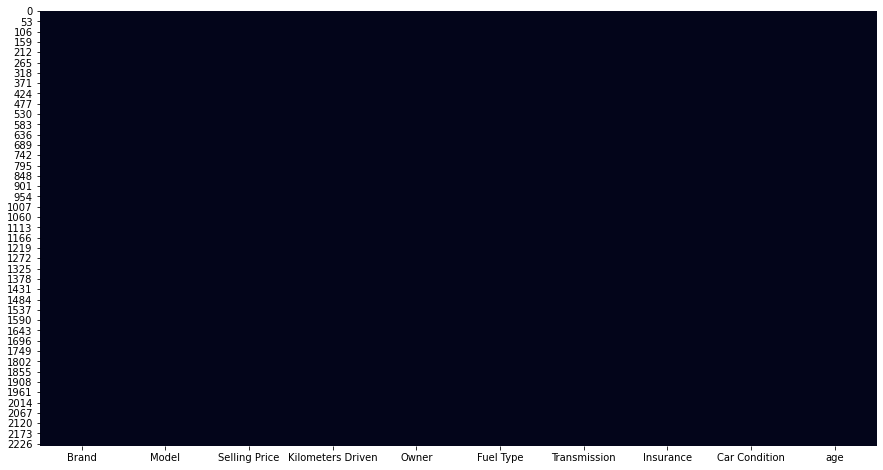

In [20]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [21]:
df_numeric_features = df.select_dtypes(include=np.number)
df_numeric_features.columns

Index(['Selling Price', 'Kilometers Driven', 'Car Condition', 'age'], dtype='object')

In [22]:
corr=df_numeric_features.corr()
corr

,Selling Price,Kilometers Driven,Car Condition,age
Selling Price,1.000000,-0.163254,0.435813,-0.568156
Kilometers Driven,-0.163254,1.000000,-0.450421,0.427502
Car Condition,0.435813,-0.450421,1.000000,-0.649011
age,-0.568156,0.427502,-0.649011,1.000000


<a id='EDA'></a>
# Exploratory Data Analysis

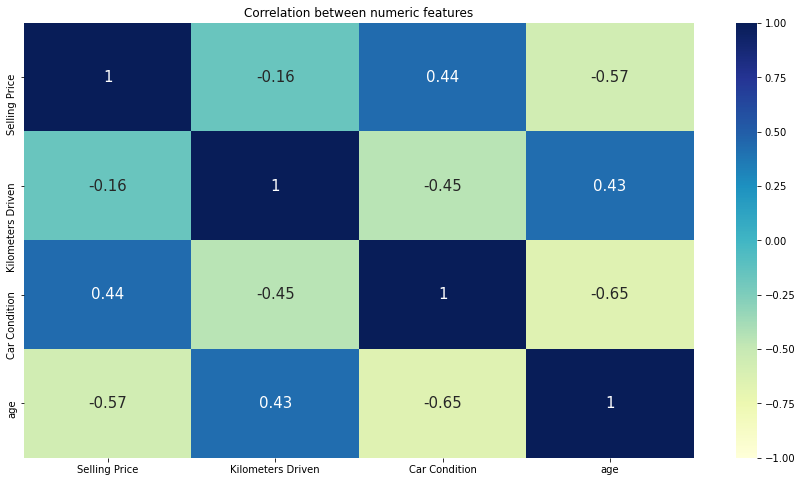

In [23]:
plt.figure(figsize=(15, 8))
sns.heatmap(corr, cmap='YlGnBu', vmax=1.0, vmin=-1.0, annot = True, annot_kws={"size": 15}, )
plt.title('Correlation between numeric features')
plt.show()

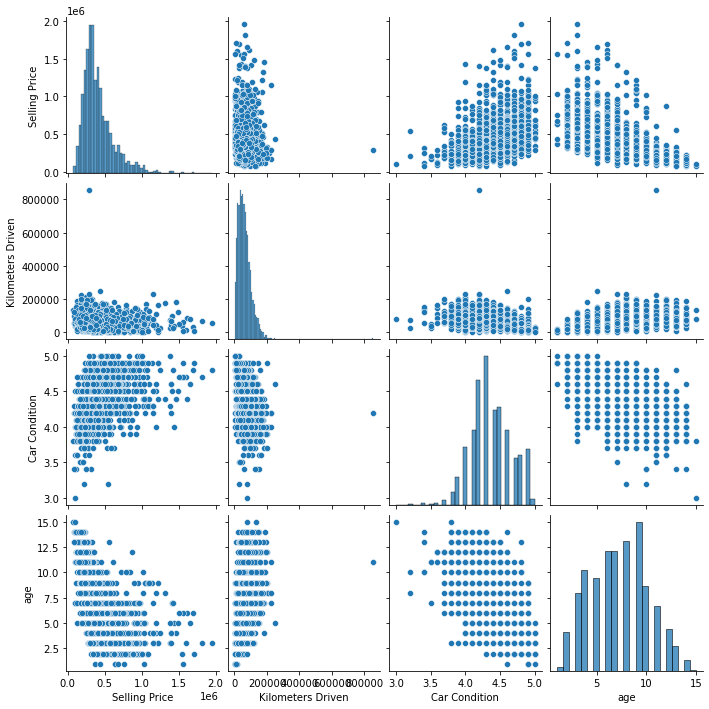

In [24]:
sns.pairplot(data=df)

In [25]:
df.describe(include=object)

,Brand,Model,Owner,Fuel Type,Transmission,Insurance
count,2237,2237,2237,2237,2237,2237
unique,20,436,3,4,2,2
top,Maruti,Maruti Swift,First Owner,Petrol,MANUAL,yes
freq,1038,118,1707,1384,2067,1973


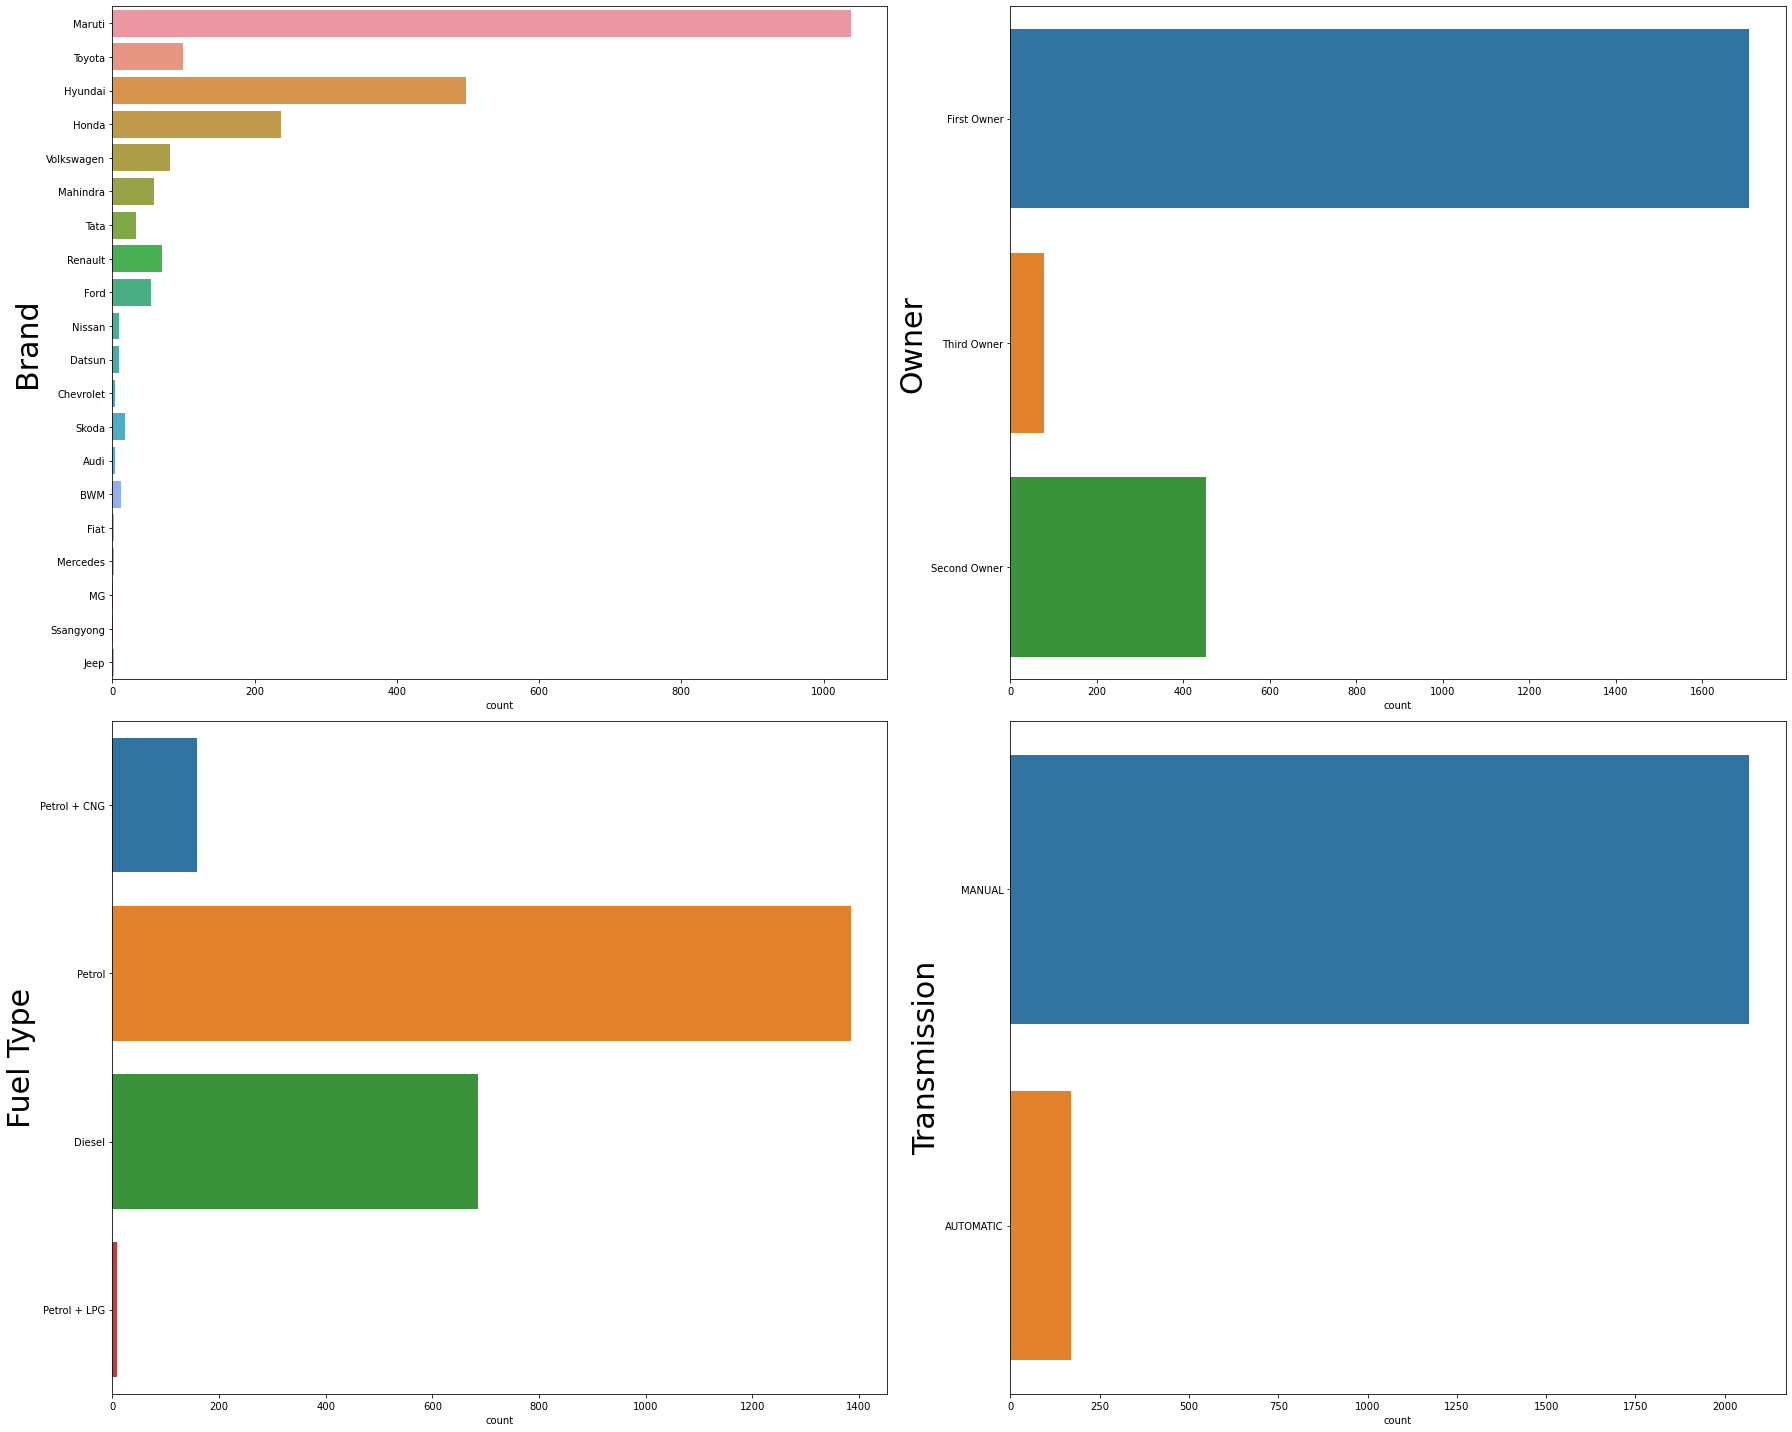

In [26]:
df_categoric_features = df.select_dtypes(include='object').drop('Model',axis=1)
fig, ax = plt.subplots(2, 2, figsize=(25, 20))
for variable, subplot in zip(df_categoric_features, ax.flatten()):
    countplot = sns.countplot(y=df[variable], ax=subplot )
    countplot.set_ylabel(variable, fontsize = 30)
plt.tight_layout()   
plt.show()

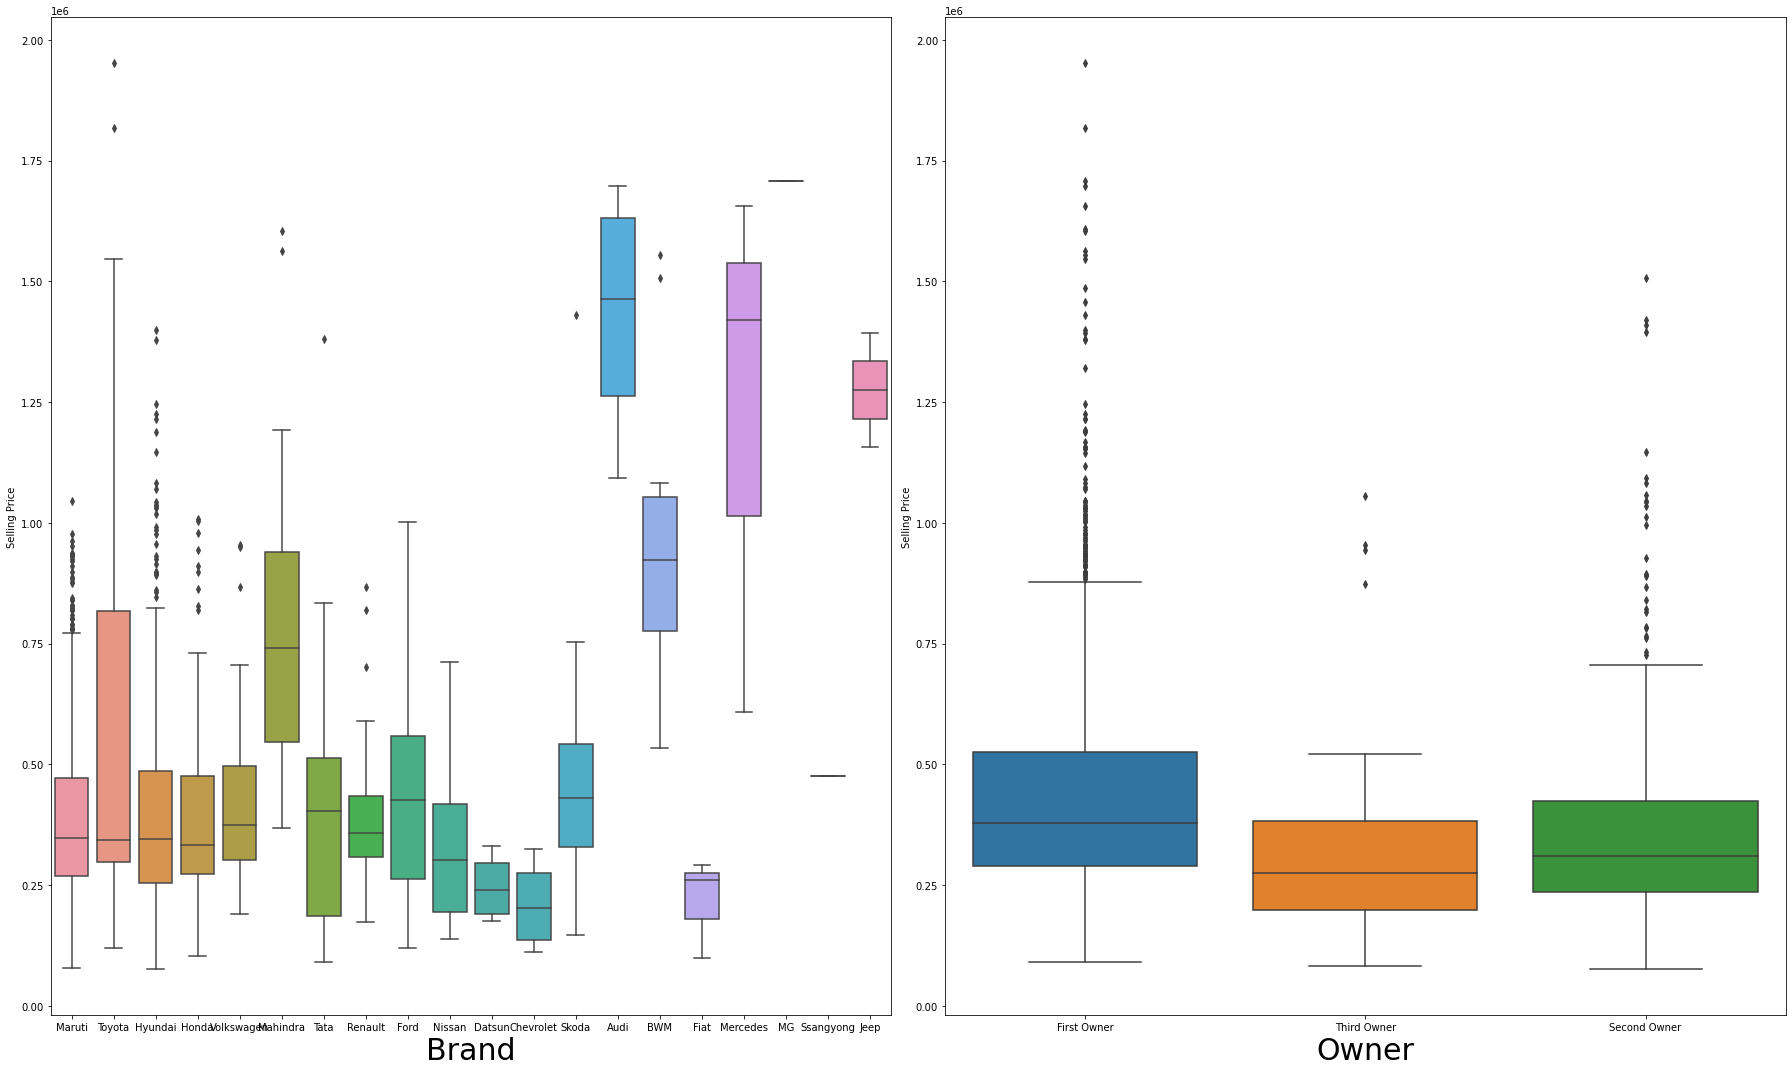

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(25, 15))
for variable, subplot in zip(df_categoric_features, ax.flatten()):
    boxplt = sns.boxplot(x=variable, y='Selling Price', data=df, ax=subplot)
    boxplt.set_xlabel(variable, fontsize = 30)
plt.tight_layout()   
plt.show() 

<a id='RO'></a>
# Removing Outliers

In [28]:
Q1 = df_numeric_features.drop(['Selling Price'], axis=1).quantile(0.25)
Q3 = df_numeric_features.drop(['Selling Price'], axis=1).quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Kilometers Driven   51290.000000
Car Condition           0.400000
age                     4.000000
dtype: float64


In [29]:
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.head(10)

,Brand,Model,Selling Price,Kilometers Driven,Owner,Fuel Type,Transmission,Insurance,Car Condition,age
0,Maruti,Maruti WagonR1.0LXI,312165,82238,First Owner,Petrol + CNG,MANUAL,no,4.200000,7
1,Toyota,Toyota EtiosLiva,313799,30558,First Owner,Petrol,MANUAL,yes,4.400000,8
2,Maruti,Maruti Alto800,295999,22164,First Owner,Petrol,MANUAL,yes,4.800000,3
3,Maruti,Maruti Swift,435199,30535,First Owner,Diesel,MANUAL,yes,4.300000,8
4,Maruti,Maruti WagonR1.0,289099,15738,First Owner,Petrol,MANUAL,yes,4.300000,8
5,Hyundai,Hyundai Elitei20ASTA1.2,708199,32652,First Owner,Petrol,MANUAL,yes,4.700000,3
6,Hyundai,Hyundai Grandi10SPORTZ1.2KAPPA,410788,32496,First Owner,Petrol,MANUAL,no,4.400000,8
7,Hyundai,Hyundai Elitei20ASTA,606599,27487,First Owner,Petrol,MANUAL,yes,4.600000,6
8,Maruti,Maruti Celerio,459199,41383,First Owner,Petrol,MANUAL,yes,4.400000,3
9,Maruti,Maruti WagonR1.0,265899,65476,First Owner,Petrol + CNG,MANUAL,yes,4.300000,9


In [30]:
df.shape

(2175, 10)

<a id='Norm'></a>
# Checking Normality

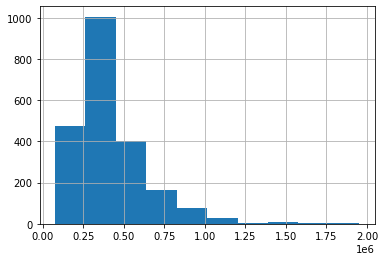

In [31]:
df['Selling Price'].hist()
plt.show()

The null and alternate hypothesis of Shapiro test are as follows: <br>
    
    H0: The data is normally distributed
    H1: The data is not normally distributed

In [32]:
stat, p = shapiro(df["Selling Price"])
print('Statistics=%.3f, p-value=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('The data is normally distributed (fail to reject H0)')
else:
    print('The data is not normally distributed (reject H0)')

Statistics=0.846, p-value=0.000
The data is not normally distributed (reject H0)


In [33]:
df['log_price'] = np.log(df['Selling Price'])

# display first 5 rows of the data
df.head()

,Brand,Model,Selling Price,Kilometers Driven,Owner,Fuel Type,Transmission,Insurance,Car Condition,age,log_price
0,Maruti,Maruti WagonR1.0LXI,312165,82238,First Owner,Petrol + CNG,MANUAL,no,4.200000,7,12.651287
1,Toyota,Toyota EtiosLiva,313799,30558,First Owner,Petrol,MANUAL,yes,4.400000,8,12.656508
2,Maruti,Maruti Alto800,295999,22164,First Owner,Petrol,MANUAL,yes,4.800000,3,12.598111
3,Maruti,Maruti Swift,435199,30535,First Owner,Diesel,MANUAL,yes,4.300000,8,12.983559
4,Maruti,Maruti WagonR1.0,289099,15738,First Owner,Petrol,MANUAL,yes,4.300000,8,12.574524


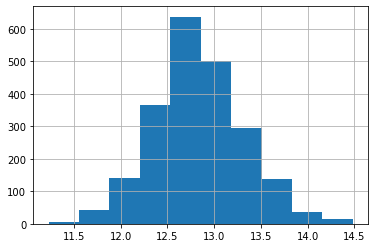

In [34]:
df['log_price'].hist()
plt.show()

In [35]:
stat, p = shapiro(df["log_price"])
print('Statistics=%.3f, p-value=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('The data is normally distributed (fail to reject H0)')
else:
    print('The data is not normally distributed (reject H0)')

Statistics=0.996, p-value=0.000
The data is not normally distributed (reject H0)


#### SInce the shapiro test is rejecting H0, the data is not normally distributed. We do not consider transforming the target variable.

In [36]:
df.drop('log_price',axis=1,inplace=True)

<a id='EN'></a>
# Encoding Categorical Variables

In [37]:
df.head()

,Brand,Model,Selling Price,Kilometers Driven,Owner,Fuel Type,Transmission,Insurance,Car Condition,age
0,Maruti,Maruti WagonR1.0LXI,312165,82238,First Owner,Petrol + CNG,MANUAL,no,4.200000,7
1,Toyota,Toyota EtiosLiva,313799,30558,First Owner,Petrol,MANUAL,yes,4.400000,8
2,Maruti,Maruti Alto800,295999,22164,First Owner,Petrol,MANUAL,yes,4.800000,3
3,Maruti,Maruti Swift,435199,30535,First Owner,Diesel,MANUAL,yes,4.300000,8
4,Maruti,Maruti WagonR1.0,289099,15738,First Owner,Petrol,MANUAL,yes,4.300000,8


In [38]:
labelencoder = LabelEncoder() 
df['Label_Brand']= labelencoder.fit_transform(df.Brand)
df.head()

,Brand,Model,Selling Price,Kilometers Driven,Owner,Fuel Type,Transmission,Insurance,Car Condition,age,Label_Brand
0,Maruti,Maruti WagonR1.0LXI,312165,82238,First Owner,Petrol + CNG,MANUAL,no,4.200000,7,11
1,Toyota,Toyota EtiosLiva,313799,30558,First Owner,Petrol,MANUAL,yes,4.400000,8,18
2,Maruti,Maruti Alto800,295999,22164,First Owner,Petrol,MANUAL,yes,4.800000,3,11
3,Maruti,Maruti Swift,435199,30535,First Owner,Diesel,MANUAL,yes,4.300000,8,11
4,Maruti,Maruti WagonR1.0,289099,15738,First Owner,Petrol,MANUAL,yes,4.300000,8,11


In [39]:
df_numeric_features = df.select_dtypes(include=np.number)
df_numeric_features.columns

Index(['Selling Price', 'Kilometers Driven', 'Car Condition', 'age',
       'Label_Brand'],
      dtype='object')

In [40]:
df_categoric_features = df.select_dtypes(include=[np.object]).drop(['Model','Brand'],axis =1)
df_categoric_features.columns

Index(['Owner', 'Fuel Type', 'Transmission', 'Insurance'], dtype='object')

In [41]:
for col in df_categoric_features.columns.values:
    dummy_encoded_variables = pd.get_dummies(df_categoric_features[col], prefix=col, drop_first=True)
    df_categoric_features = pd.concat([df_categoric_features, dummy_encoded_variables],axis=1)
    df_categoric_features.drop([col], axis=1, inplace=True)

In [42]:
df_dummy = pd.concat([df_numeric_features, df_categoric_features], axis=1)
df_dummy.head()

,Selling Price,Kilometers Driven,Car Condition,age,Label_Brand,Owner_Second Owner,Owner_Third Owner,Fuel Type_Petrol,Fuel Type_Petrol + CNG,Fuel Type_Petrol + LPG,Transmission_MANUAL,Insurance_yes
0,312165,82238,4.200000,7,11,0,0,0,1,0,1,0
1,313799,30558,4.400000,8,18,0,0,1,0,0,1,1
2,295999,22164,4.800000,3,11,0,0,1,0,0,1,1
3,435199,30535,4.300000,8,11,0,0,0,0,0,1,1
4,289099,15738,4.300000,8,11,0,0,1,0,0,1,1


<a id='FS'></a>
# Feature Selection

In [43]:
df_cons = df_dummy.copy()
df_cons.head()

,Selling Price,Kilometers Driven,Car Condition,age,Label_Brand,Owner_Second Owner,Owner_Third Owner,Fuel Type_Petrol,Fuel Type_Petrol + CNG,Fuel Type_Petrol + LPG,Transmission_MANUAL,Insurance_yes
0,312165,82238,4.200000,7,11,0,0,0,1,0,1,0
1,313799,30558,4.400000,8,18,0,0,1,0,0,1,1
2,295999,22164,4.800000,3,11,0,0,1,0,0,1,1
3,435199,30535,4.300000,8,11,0,0,0,0,0,1,1
4,289099,15738,4.300000,8,11,0,0,1,0,0,1,1


In [44]:
X = df_cons.drop('Selling Price', axis = 1)
y = df_cons['Selling Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 10)
X.head()

,Kilometers Driven,Car Condition,age,Label_Brand,Owner_Second Owner,Owner_Third Owner,Fuel Type_Petrol,Fuel Type_Petrol + CNG,Fuel Type_Petrol + LPG,Transmission_MANUAL,Insurance_yes
0,82238,4.200000,7,11,0,0,0,1,0,1,0
1,30558,4.400000,8,18,0,0,1,0,0,1,1
2,22164,4.800000,3,11,0,0,1,0,0,1,1
3,30535,4.300000,8,11,0,0,0,0,0,1,1
4,15738,4.300000,8,11,0,0,1,0,0,1,1


In [45]:
linreg = LinearRegression()
linreg_forward = sfs(estimator=linreg, k_features = 'best', forward=True,
                     verbose=2, scoring='r2')
sfs_forward = linreg_forward.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s finished

[2021-05-16 19:20:14] Features: 1/11 -- score: 0.32130335091384266[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished

[2021-05-16 19:20:14] Features: 2/11 -- score: 0.3808119438667067[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished

[2021-05-16 19:20:14] Features: 3/11 -- score: 0.4377800780327421[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 

In [46]:
print('Features selelected using forward selection are: ')
print(sfs_forward.k_feature_names_)

print('\nR-Squared: ', sfs_forward.k_score_)

Features selelected using forward selection are: 
('Car Condition', 'age', 'Label_Brand', 'Fuel Type_Petrol', 'Fuel Type_Petrol + CNG', 'Fuel Type_Petrol + LPG', 'Transmission_MANUAL', 'Insurance_yes')

R-Squared:  0.4742778628516195


In [47]:
df_cons.head()

,Selling Price,Kilometers Driven,Car Condition,age,Label_Brand,Owner_Second Owner,Owner_Third Owner,Fuel Type_Petrol,Fuel Type_Petrol + CNG,Fuel Type_Petrol + LPG,Transmission_MANUAL,Insurance_yes
0,312165,82238,4.200000,7,11,0,0,0,1,0,1,0
1,313799,30558,4.400000,8,18,0,0,1,0,0,1,1
2,295999,22164,4.800000,3,11,0,0,1,0,0,1,1
3,435199,30535,4.300000,8,11,0,0,0,0,0,1,1
4,289099,15738,4.300000,8,11,0,0,1,0,0,1,1


In [48]:
df_dummy.drop(['Kilometers Driven','Owner_Second Owner','Owner_Third Owner'],axis=1,inplace=True)
df_dummy.head()

,Selling Price,Car Condition,age,Label_Brand,Fuel Type_Petrol,Fuel Type_Petrol + CNG,Fuel Type_Petrol + LPG,Transmission_MANUAL,Insurance_yes
0,312165,4.200000,7,11,0,1,0,1,0
1,313799,4.400000,8,18,1,0,0,1,1
2,295999,4.800000,3,11,1,0,0,1,1
3,435199,4.300000,8,11,0,0,0,1,1
4,289099,4.300000,8,11,1,0,0,1,1


<a id='SC'></a>
# Scaling the Data

In [49]:
df_dummy.iloc[:, 0:5] = df_dummy.iloc[:, 0:5].apply(lambda rec: (rec - rec.mean()) / rec.std())

df_dummy.head()

,Selling Price,Car Condition,age,Label_Brand,Fuel Type_Petrol,Fuel Type_Petrol + CNG,Fuel Type_Petrol + LPG,Transmission_MANUAL,Insurance_yes
0,-0.478400,-0.653281,-0.058625,0.256960,-1.291489,1,0,1,0
1,-0.471160,0.065609,0.290718,2.217967,0.773944,0,0,1,1
2,-0.550033,1.503389,-1.455998,0.256960,0.773944,0,0,1,1
3,0.066772,-0.293836,0.290718,0.256960,-1.291489,0,0,1,1
4,-0.580607,-0.293836,0.290718,0.256960,0.773944,0,0,1,1


In [50]:
df.iloc[:, [2,3,8,9,10]] = df.iloc[:, [2,3,8,9,10]].apply(lambda rec: (rec - rec.mean()) / rec.std())

df.head()

,Brand,Model,Selling Price,Kilometers Driven,Owner,Fuel Type,Transmission,Insurance,Car Condition,age,Label_Brand
0,Maruti,Maruti WagonR1.0LXI,-0.478400,0.675566,First Owner,Petrol + CNG,MANUAL,no,-0.653281,-0.058625,0.256960
1,Toyota,Toyota EtiosLiva,-0.471160,-0.815796,First Owner,Petrol,MANUAL,yes,0.065609,0.290718,2.217967
2,Maruti,Maruti Alto800,-0.550033,-1.058027,First Owner,Petrol,MANUAL,yes,1.503389,-1.455998,0.256960
3,Maruti,Maruti Swift,0.066772,-0.816460,First Owner,Diesel,MANUAL,yes,-0.293836,0.290718,0.256960
4,Maruti,Maruti WagonR1.0,-0.580607,-1.243466,First Owner,Petrol,MANUAL,yes,-0.293836,0.290718,0.256960


<a id='MLR'></a>
# Multiple Linear Regression

<a id='1'></a>
## Model with Target Variable

In [51]:
df_dummy = sm.add_constant(df_dummy)
X = df_dummy.drop(['Selling Price'], axis=1)
y = df_dummy[['Selling Price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print("The shape of X_train is:",X_train.shape)
print("The shape of X_test is:",X_test.shape)
print("The shape of y_train is:",y_train.shape)
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (1631, 9)
The shape of X_test is: (544, 9)
The shape of y_train is: (1631, 1)
The shape of y_test is: (544, 1)


In [52]:
linreg_full_model = sm.OLS(y_train["Selling Price"], X_train).fit()
print(linreg_full_model.summary())

                            OLS Regression Results                            
Dep. Variable:          Selling Price   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     190.7
Date:                Sun, 16 May 2021   Prob (F-statistic):          3.28e-227
Time:                        19:20:16   Log-Likelihood:                -1790.4
No. Observations:                1631   AIC:                             3599.
Df Residuals:                    1622   BIC:                             3647.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [53]:
linreg_full_model_predictions = linreg_full_model.predict(X_test)

In [54]:
predicted_price = linreg_full_model_predictions
actual_price = y_test['Selling Price']

In [55]:
linreg_full_model_rmse = rmse(actual_price, predicted_price)
linreg_full_model_rsquared = linreg_full_model.rsquared
linreg_full_model_rsquared_adj = linreg_full_model.rsquared_adj 

In [56]:
score_card = pd.DataFrame(columns=['Model_Name', 'R-Squared', 'Adj. R-Squared', 'RMSE'])
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE


In [57]:
linreg_full_model_metrics = pd.Series({
                     'Model_Name': "Linreg full model with target variable",
                     'RMSE':linreg_full_model_rmse,
                     'R-Squared': linreg_full_model_rsquared,
                     'Adj. R-Squared': linreg_full_model_rsquared_adj     
                   })
score_card = score_card.append(linreg_full_model_metrics, ignore_index=True)
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model with target variable,0.484664,0.482122,0.708046


<a id='2'></a>
## Using p-value to remove insiginficant variables

In [58]:
linreg_full_model_pvalues = pd.DataFrame(linreg_full_model.pvalues, columns=["P-Value"])
linreg_full_model_pvalues

,P-Value
const,0.000000
Car Condition,0.000000
age,0.000000
Label_Brand,0.000066
Fuel Type_Petrol,0.000000
Fuel Type_Petrol + CNG,0.000000
Fuel Type_Petrol + LPG,0.070449
Transmission_MANUAL,0.000000
Insurance_yes,0.507948


In [59]:
insignificant_variables = linreg_full_model_pvalues[
                                                        linreg_full_model_pvalues['P-Value']  > 0.05]
insigni_var = insignificant_variables.index
insigni_var = insigni_var.to_list()
insigni_var

['Fuel Type_Petrol + LPG', 'Insurance_yes']

<a id='3'></a>
## Model with insignificant variables

In [60]:
X_significant = df.drop(["Insurance","Brand",'Owner','Model'], axis=1)

In [61]:
df_significant_categoric_features = X_significant.select_dtypes(include=[np.object])
df_significant_categoric_features.columns

Index(['Fuel Type', 'Transmission'], dtype='object')

In [62]:
X_significant.head()

,Selling Price,Kilometers Driven,Fuel Type,Transmission,Car Condition,age,Label_Brand
0,-0.478400,0.675566,Petrol + CNG,MANUAL,-0.653281,-0.058625,0.256960
1,-0.471160,-0.815796,Petrol,MANUAL,0.065609,0.290718,2.217967
2,-0.550033,-1.058027,Petrol,MANUAL,1.503389,-1.455998,0.256960
3,0.066772,-0.816460,Diesel,MANUAL,-0.293836,0.290718,0.256960
4,-0.580607,-1.243466,Petrol,MANUAL,-0.293836,0.290718,0.256960


In [63]:
for col in df_significant_categoric_features.columns.values:
    dummy_encoded_variables = pd.get_dummies(df_significant_categoric_features[col], prefix=col, drop_first=True)
    df_significant_categoric_features = pd.concat([df_significant_categoric_features, dummy_encoded_variables],axis=1)
    df_significant_categoric_features.drop([col], axis=1, inplace=True)

In [64]:
df_significant = pd.concat([X_significant, df_significant_categoric_features], axis=1)
df_significant.head()

,Selling Price,Kilometers Driven,Fuel Type,Transmission,Car Condition,age,Label_Brand,Fuel Type_Petrol,Fuel Type_Petrol + CNG,Fuel Type_Petrol + LPG,Transmission_MANUAL
0,-0.478400,0.675566,Petrol + CNG,MANUAL,-0.653281,-0.058625,0.256960,0,1,0,1
1,-0.471160,-0.815796,Petrol,MANUAL,0.065609,0.290718,2.217967,1,0,0,1
2,-0.550033,-1.058027,Petrol,MANUAL,1.503389,-1.455998,0.256960,1,0,0,1
3,0.066772,-0.816460,Diesel,MANUAL,-0.293836,0.290718,0.256960,0,0,0,1
4,-0.580607,-1.243466,Petrol,MANUAL,-0.293836,0.290718,0.256960,1,0,0,1


In [65]:
df_significant = sm.add_constant(df_significant)
X = df_significant.drop(['Fuel Type','Transmission','Selling Price'], axis=1)
y = df_significant[['Selling Price']]
X_train_significant, X_test_significant, y_train, y_test = train_test_split(X, y, random_state=1)
print("The shape of X_train is:",X_train.shape)
print("The shape of X_test is:",X_test.shape)
print("The shape of y_train is:",y_train.shape)
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (1631, 9)
The shape of X_test is: (544, 9)
The shape of y_train is: (1631, 1)
The shape of y_test is: (544, 1)


In [66]:
linreg_model_with_significant_var = sm.OLS(y_train['Selling Price'], X_train_significant).fit()
print(linreg_model_with_significant_var.summary())

                            OLS Regression Results                            
Dep. Variable:          Selling Price   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     190.6
Date:                Sun, 16 May 2021   Prob (F-statistic):          3.92e-227
Time:                        19:20:18   Log-Likelihood:                -1790.6
No. Observations:                1631   AIC:                             3599.
Df Residuals:                    1622   BIC:                             3648.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

In [67]:
predicted_price = linreg_model_with_significant_var.predict(X_test_significant)
actual_price = y_test['Selling Price']

In [68]:
linreg_model_with_significant_var_rmse = rmse(actual_price, predicted_price)
linreg_model_with_significant_var_rsquared = linreg_model_with_significant_var.rsquared
linreg_model_with_significant_var_rsquared_adj = linreg_model_with_significant_var.rsquared_adj 

In [69]:
linreg_model_with_significant_var_metrics = pd.Series({
                     'Model_Name': "Linreg model with significant variables",
                     'RMSE': linreg_model_with_significant_var_rmse,
                     'R-Squared': linreg_model_with_significant_var_rsquared,
                     'Adj. R-Squared': linreg_model_with_significant_var_rsquared_adj     
                   })
score_card = score_card.append(linreg_model_with_significant_var_metrics, ignore_index=True)
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model with target variable,0.484664,0.482122,0.708046
1,Linreg model with significant variables,0.484549,0.482007,0.708688


<a id='4'></a>
## Detecting Heteroskedasticity

In [70]:
name = ['f-value','p-value']           
test = sms.het_breuschpagan(linreg_model_with_significant_var.resid, linreg_model_with_significant_var.model.exog)
lzip(name, test)           

[('f-value', 158.23673671422563), ('p-value', 3.737479837992258e-30)]

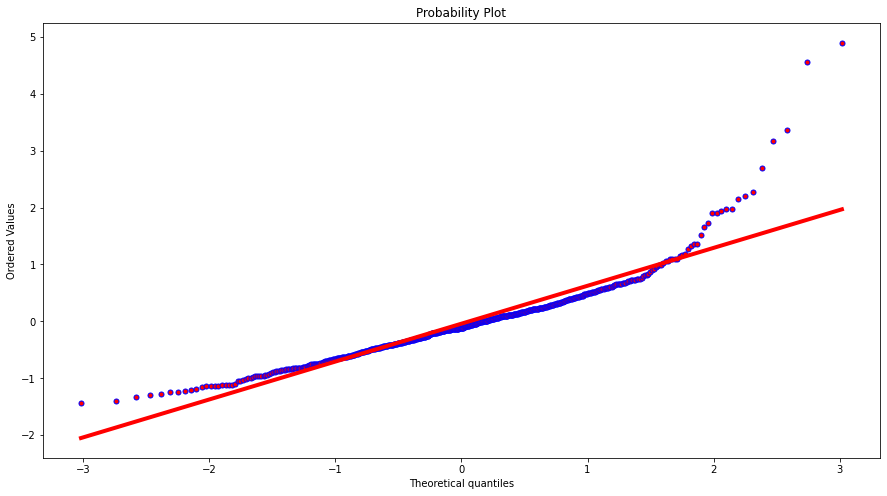

In [71]:
fitted_vals = linreg_model_with_significant_var.predict(X_test_significant)
resids = actual_price - fitted_vals
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
stats.probplot(resids, plot=plt)
ax.get_lines()[0].set_marker('o')
ax.get_lines()[0].set_markersize(5.0)
ax.get_lines()[0].set_markerfacecolor('r')
ax.get_lines()[1].set_linewidth(4.0)
plt.show()

In [72]:
linreg_model_with_significant_var.resid.mean()

-5.284961105573093e-16

In [73]:
stat, p = jarque_bera(resids)
print('Statistics=%.3f, p-value=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('The data is normally distributed (fail to reject H0)')
else:
    print('The data is not normally distributed (reject H0)')

Statistics=2191.868, p-value=0.000
The data is not normally distributed (reject H0)


<a id='5'></a>
## Full Model with Siginificant Variables

In [74]:
df_num_scaled = df_numeric_features.apply(lambda rec: (rec - rec.mean()) / rec.std())
df_scaled = pd.concat([df_num_scaled, df_categoric_features], axis = 1)
df_scaled =sm.add_constant(df_scaled)

In [75]:
mean_numeric_features = df_numeric_features.mean()
std_numeric_features = df_numeric_features.std()

In [76]:
df_scaled.head()

,const,Selling Price,Kilometers Driven,Car Condition,age,Label_Brand,Owner_Second Owner,Owner_Third Owner,Fuel Type_Petrol,Fuel Type_Petrol + CNG,Fuel Type_Petrol + LPG,Transmission_MANUAL,Insurance_yes
0,1.000000,-0.478400,0.675566,-0.653281,-0.058625,0.256960,0,0,0,1,0,1,0
1,1.000000,-0.471160,-0.815796,0.065609,0.290718,2.217967,0,0,1,0,0,1,1
2,1.000000,-0.550033,-1.058027,1.503389,-1.455998,0.256960,0,0,1,0,0,1,1
3,1.000000,0.066772,-0.816460,-0.293836,0.290718,0.256960,0,0,0,0,0,1,1
4,1.000000,-0.580607,-1.243466,-0.293836,0.290718,0.256960,0,0,1,0,0,1,1


In [77]:
X = df_scaled.drop(['Selling Price'], axis=1)
y = df_scaled['Selling Price']
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X, y, random_state=1)
print("The shape of X_train_scaled is:",X_train_scaled.shape)
print("The shape of X_test_scaled is:",X_test_scaled.shape)
print("The shape of y_train_scaled is:",y_train_scaled.shape)
print("The shape of y_test_scaled is:",y_test_scaled.shape)

The shape of X_train_scaled is: (1631, 12)
The shape of X_test_scaled is: (544, 12)
The shape of y_train_scaled is: (1631,)
The shape of y_test_scaled is: (544,)


In [78]:
X_train_scaled_significant = X_train_scaled.drop(insigni_var, axis=1)
X_test_scaled_significant = X_test_scaled.drop(insigni_var, axis=1)

In [79]:
linreg_model_with_significant_scaled_vars = sm.OLS(y_train_scaled,X_train_scaled_significant).fit()
print(linreg_model_with_significant_scaled_vars.summary())

                            OLS Regression Results                            
Dep. Variable:          Selling Price   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     168.7
Date:                Sun, 16 May 2021   Prob (F-statistic):          2.37e-225
Time:                        19:20:20   Log-Likelihood:                -1792.0
No. Observations:                1631   AIC:                             3604.
Df Residuals:                    1621   BIC:                             3658.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

In [80]:
predicted_price = linreg_model_with_significant_scaled_vars.predict(X_test_scaled_significant)
actual_price = y_test['Selling Price']

In [81]:
linreg_model_with_significant_scaled_vars_rmse = rmse(actual_price, predicted_price)
linreg_model_with_significant_scaled_vars_rsquared = linreg_model_with_significant_scaled_vars.rsquared
linreg_model_with_significant_scaled_vars_rsquared_adj = linreg_model_with_significant_scaled_vars.rsquared_adj 

In [82]:
linreg_model_with_significant_scaled_vars_metrics = pd.Series({
                     'Model_Name': "Linreg full model with scaled significant variables",
                     'RMSE': linreg_model_with_significant_scaled_vars_rmse,
                     'R-Squared': linreg_model_with_significant_scaled_vars_rsquared,
                     'Adj. R-Squared': linreg_model_with_significant_scaled_vars_rsquared_adj     
                   })
score_card = score_card.append(linreg_model_with_significant_scaled_vars_metrics, ignore_index = True)
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model with target variable,0.484664,0.482122,0.708046
1,Linreg model with significant variables,0.484549,0.482007,0.708688
2,Linreg full model with scaled significant vari...,0.483627,0.480760,0.711652


<a id='6'></a>
## Model with Interaction Effect 

In [83]:
df_interaction = df_scaled.copy()
# add the interaction variable
df_interaction['a*k'] = df_interaction['age']*df_interaction['Car Condition'] 
df_interaction.head()

,const,Selling Price,Kilometers Driven,Car Condition,age,Label_Brand,Owner_Second Owner,Owner_Third Owner,Fuel Type_Petrol,Fuel Type_Petrol + CNG,Fuel Type_Petrol + LPG,Transmission_MANUAL,Insurance_yes,a*k
0,1.000000,-0.478400,0.675566,-0.653281,-0.058625,0.256960,0,0,0,1,0,1,0,0.038299
1,1.000000,-0.471160,-0.815796,0.065609,0.290718,2.217967,0,0,1,0,0,1,1,0.019074
2,1.000000,-0.550033,-1.058027,1.503389,-1.455998,0.256960,0,0,1,0,0,1,1,-2.188931
3,1.000000,0.066772,-0.816460,-0.293836,0.290718,0.256960,0,0,0,0,0,1,1,-0.085423
4,1.000000,-0.580607,-1.243466,-0.293836,0.290718,0.256960,0,0,1,0,0,1,1,-0.085423


In [84]:
X = df_interaction.drop(['Selling Price'], axis=1)
y = df_interaction['Selling Price']
X_train_interaction, X_test_interaction, y_train, y_test = train_test_split( X, y, random_state=1)
print("The shape of X_train_interaction is:",X_train_interaction.shape)
print("The shape of X_test_interaction is:",X_test_interaction.shape)
print("The shape of y_train is:",y_train.shape)
print("The shape of y_test is:",y_test.shape)

The shape of X_train_interaction is: (1631, 13)
The shape of X_test_interaction is: (544, 13)
The shape of y_train is: (1631,)
The shape of y_test is: (544,)


In [85]:
linreg_with_interaction = sm.OLS(y_train, X_train_interaction).fit()
print(linreg_with_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:          Selling Price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     130.9
Date:                Sun, 16 May 2021   Prob (F-statistic):          3.94e-228
Time:                        19:20:20   Log-Likelihood:                -1777.8
No. Observations:                1631   AIC:                             3582.
Df Residuals:                    1618   BIC:                             3652.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

In [86]:
predicted_price = linreg_with_interaction.predict(X_test_interaction)
actual_price = y_test

In [87]:
linreg_with_interaction_rmse = rmse(actual_price, predicted_price)
linreg_with_interaction_rsquared = linreg_with_interaction.rsquared
linreg_with_interaction_rsquared_adj = linreg_with_interaction.rsquared_adj 

In [88]:
linreg_with_interaction_metrics = pd.Series({
                     'Model_Name': "linreg_with_interaction",
                     'RMSE': linreg_with_interaction_rmse,
                     'R-Squared': linreg_with_interaction_rsquared,
                     'Adj. R-Squared': linreg_with_interaction_rsquared_adj     
                   })
score_card = score_card.append(linreg_with_interaction_metrics, ignore_index = True)
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model with target variable,0.484664,0.482122,0.708046
1,Linreg model with significant variables,0.484549,0.482007,0.708688
2,Linreg full model with scaled significant vari...,0.483627,0.480760,0.711652
3,linreg_with_interaction,0.492552,0.488788,0.703835


<a id='Reg'></a>
# Regularization

<a id='RR'></a>
## Ridge Regression

In [89]:
col = list(X_train_scaled.columns)
col.append('ssr')
col.append('R squared')
col.append('Adj. R squared')
col.append('RMSE')

In [90]:
ridge_regression = sm.OLS(y_train_scaled, X_train_scaled)
results_fu = ridge_regression.fit()

In [91]:
frames = []
for n in np.arange(0.0001,10.1, 0.1).tolist():
    results_fr = ridge_regression.fit_regularized(L1_wt=0, alpha=n, start_params=results_fu.params)
    results_fr_fit = sm.regression.linear_model.OLSResults(model=ridge_regression, 
                                             params=results_fr.params, 
                                             normalized_cov_params=ridge_regression.normalized_cov_params)
    results_fr_fit_predictions = results_fr_fit.predict(X_test_scaled)
    results_fr_fit_rmse = rmse(y_test, results_fr_fit_predictions)    
    list_metric = [results_fr_fit.ssr, results_fr_fit.rsquared, results_fr_fit.rsquared_adj, results_fr_fit_rmse]
    frames.append(np.append(results_fr.params, list_metric))
    df_params = pd.DataFrame(frames, columns= col)
df_params.index=np.arange(0.0001, 10.1, 0.1).tolist()
df_params.index.name = 'alpha*'
df_params

,const,Kilometers Driven,Car Condition,age,Label_Brand,Owner_Second Owner,Owner_Third Owner,Fuel Type_Petrol,Fuel Type_Petrol + CNG,Fuel Type_Petrol + LPG,Transmission_MANUAL,Insurance_yes,ssr,R squared,Adj. R squared,RMSE
alpha*,,,,,,,,,,,,,,,,
0.000100,1.105489,-0.006472,0.123766,-0.446997,-0.072052,0.027414,0.033298,-0.775076,-0.985844,-0.574110,-0.628074,0.039650,857.677526,0.484817,0.481317,0.708124
0.100100,0.252971,0.044130,0.160702,-0.428683,-0.047326,0.026669,0.007536,-0.355954,-0.299366,-0.008885,-0.152064,0.123560,962.334206,0.421953,0.418026,0.723268
0.200100,0.146476,0.039443,0.167999,-0.390090,-0.036826,0.013601,-0.000558,-0.256738,-0.168974,-0.004187,-0.088272,0.094212,1011.843095,0.392214,0.388085,0.737658
0.300100,0.103558,0.030677,0.168328,-0.358051,-0.029765,0.006391,-0.003203,-0.206079,-0.115151,-0.002896,-0.063010,0.075107,1044.357703,0.372684,0.368422,0.748235
0.400100,0.079958,0.022283,0.165883,-0.331556,-0.024580,0.002056,-0.004301,-0.174019,-0.086305,-0.002308,-0.049678,0.062242,1070.014256,0.357273,0.352906,0.757057
0.500100,0.064882,0.015033,0.162203,-0.309285,-0.020607,-0.000728,-0.004793,-0.151449,-0.068542,-0.001970,-0.041522,0.053014,1091.904740,0.344124,0.339667,0.764820
0.600100,0.054361,0.008955,0.157982,-0.290251,-0.017477,-0.002599,-0.005004,-0.134508,-0.056603,-0.001746,-0.036047,0.046065,1111.312428,0.332466,0.327931,0.771828
0.700100,0.046582,0.003905,0.153566,-0.273749,-0.014961,-0.003896,-0.005071,-0.121231,-0.048078,-0.001584,-0.032123,0.040638,1128.891907,0.321907,0.317299,0.778247
0.800100,0.040589,-0.000282,0.149137,-0.259267,-0.012904,-0.004813,-0.005060,-0.110499,-0.041713,-0.001459,-0.029171,0.036280,1145.029545,0.312213,0.307540,0.784181


In [92]:
df_params.iloc[[0,1,-2,-1]]

,const,Kilometers Driven,Car Condition,age,Label_Brand,Owner_Second Owner,Owner_Third Owner,Fuel Type_Petrol,Fuel Type_Petrol + CNG,Fuel Type_Petrol + LPG,Transmission_MANUAL,Insurance_yes,ssr,R squared,Adj. R squared,RMSE
alpha*,,,,,,,,,,,,,,,,
0.000100,1.105489,-0.006472,0.123766,-0.446997,-0.072052,0.027414,0.033298,-0.775076,-0.985844,-0.574110,-0.628074,0.039650,857.677526,0.484817,0.481317,0.708124
0.100100,0.252971,0.044130,0.160702,-0.428683,-0.047326,0.026669,0.007536,-0.355954,-0.299366,-0.008885,-0.152064,0.123560,962.334206,0.421953,0.418026,0.723268
9.900100,0.001222,-0.012526,0.036622,-0.049456,0.000715,-0.003087,-0.001355,-0.013369,-0.003184,-0.000255,-0.005386,0.002060,1517.444031,0.088514,0.082321,0.918355
10.000100,0.001201,-0.012442,0.036318,-0.049029,0.000714,-0.003064,-0.001344,-0.013244,-0.003152,-0.000253,-0.005343,0.002033,1518.590583,0.087826,0.081628,0.918747


In [93]:
alpha = df_params.RMSE[df_params.RMSE == df_params.loc[:,'RMSE'].min()].index.tolist()
print('The required alpha is %.4f ' % (alpha[0]))

The required alpha is 0.0001 


In [94]:
df_params.apply(lambda x: sum(x.values==0),axis=1)

alpha*
0.000100     0
0.100100     0
0.200100     0
0.300100     0
0.400100     0
0.500100     0
0.600100     0
0.700100     0
0.800100     0
0.900100     0
1.000100     0
1.100100     0
1.200100     0
1.300100     0
1.400100     0
1.500100     0
1.600100     0
1.700100     0
1.800100     0
1.900100     0
2.000100     0
2.100100     0
2.200100     0
2.300100     0
2.400100     0
2.500100     0
2.600100     0
2.700100     0
2.800100     0
2.900100     0
3.000100     0
3.100100     0
3.200100     0
3.300100     0
3.400100     0
3.500100     0
3.600100     0
3.700100     0
3.800100     0
3.900100     0
4.000100     0
4.100100     0
4.200100     0
4.300100     0
4.400100     0
4.500100     0
4.600100     0
4.700100     0
4.800100     0
4.900100     0
5.000100     0
5.100100     0
5.200100     0
5.300100     0
5.400100     0
5.500100     0
5.600100     0
5.700100     0
5.800100     0
5.900100     0
6.000100     0
6.100100     0
6.200100     0
6.300100     0
6.400100     0
6.500100     0
6.6

In [95]:
results_fr = ridge_regression.fit_regularized(L1_wt=0, alpha=0.0001, start_params=results_fu.params)
ridge_regression_best = sm.regression.linear_model.OLSResults(model = ridge_regression, 
                                        params=results_fr.params, 
                                        normalized_cov_params=ridge_regression.normalized_cov_params)
print (ridge_regression_best.summary())

                            OLS Regression Results                            
Dep. Variable:          Selling Price   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     138.5
Date:                Sun, 16 May 2021   Prob (F-statistic):          6.24e-224
Time:                        19:20:22   Log-Likelihood:                -1790.2
No. Observations:                1631   AIC:                             3604.
Df Residuals:                    1619   BIC:                             3669.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

In [96]:
predicted_price = ridge_regression_best.predict(X_test_scaled)
actual_price = y_test

In [97]:
ridge_regression_best_rmse = rmse(actual_price, predicted_price)
ridge_regression_best_rsquared = ridge_regression_best.rsquared
ridge_regression_best_rsquared_adj = ridge_regression_best.rsquared_adj 

In [98]:
ridge_regression_best_metrics = pd.Series({
                     'Model_Name': "Ridge Regression",
                     'RMSE': ridge_regression_best_rmse,
                     'R-Squared': ridge_regression_best_rsquared,
                     'Adj. R-Squared': ridge_regression_best_rsquared_adj     
                   })
score_card = score_card.append(ridge_regression_best_metrics, ignore_index = True)
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model with target variable,0.484664,0.482122,0.708046
1,Linreg model with significant variables,0.484549,0.482007,0.708688
2,Linreg full model with scaled significant vari...,0.483627,0.480760,0.711652
3,linreg_with_interaction,0.492552,0.488788,0.703835
4,Ridge Regression,0.484817,0.481317,0.708124


<a id='LR'></a>
## Lasso Regression

In [99]:
lasso_regression = sm.OLS(y_train_scaled, X_train_scaled)
results_fu = lasso_regression.fit()

In [100]:
frames = []
for n in np.arange(0.0001, 0.02, 0.0001).tolist():
    results_fr = lasso_regression.fit_regularized(L1_wt=1, alpha=n, start_params=results_fu.params)
    results_fr_fit = sm.regression.linear_model.OLSResults(model=lasso_regression, 
                                                params=results_fr.params, 
                                                normalized_cov_params=lasso_regression.normalized_cov_params)
    results_fr_fit_predictions = results_fr_fit.predict(X_test_scaled)
    results_fr_fit_rmse = rmse(y_test, results_fr_fit_predictions)    
    list_metric = [results_fr_fit.ssr, results_fr_fit.rsquared, results_fr_fit.rsquared_adj, results_fr_fit_rmse]
    frames.append(np.append(results_fr.params, list_metric))
    df_params = pd.DataFrame(frames, columns= col)
df_params.index=np.arange(0.0001, 0.02, 0.0001).tolist()
df_params.index.name = 'alpha*'
df_params

,const,Kilometers Driven,Car Condition,age,Label_Brand,Owner_Second Owner,Owner_Third Owner,Fuel Type_Petrol,Fuel Type_Petrol + CNG,Fuel Type_Petrol + LPG,Transmission_MANUAL,Insurance_yes,ssr,R squared,Adj. R squared,RMSE
alpha*,,,,,,,,,,,,,,,,
0.000100,1.106413,-0.006303,0.123713,-0.447004,-0.071969,0.026567,0.029932,-0.774551,-0.985470,-0.560216,-0.628016,0.038442,857.682054,0.484815,0.481314,0.708166
0.000200,1.103175,-0.005842,0.123791,-0.447237,-0.071796,0.025933,0.026849,-0.772421,-0.982740,-0.525991,-0.625820,0.038131,857.705922,0.484800,0.481300,0.708170
0.000300,1.099938,-0.005380,0.123869,-0.447469,-0.071624,0.025300,0.023766,-0.770292,-0.980011,-0.491767,-0.623625,0.037820,857.745702,0.484776,0.481276,0.708185
0.000400,1.096700,-0.004919,0.123947,-0.447702,-0.071452,0.024666,0.020683,-0.768163,-0.977281,-0.457542,-0.621430,0.037509,857.801395,0.484743,0.481242,0.708211
0.000500,1.093462,-0.004457,0.124025,-0.447935,-0.071280,0.024032,0.017599,-0.766034,-0.974552,-0.423317,-0.619235,0.037198,857.872999,0.484700,0.481199,0.708246
0.000600,1.090225,-0.003996,0.124103,-0.448167,-0.071107,0.023399,0.014516,-0.763905,-0.971822,-0.389092,-0.617039,0.036886,857.960516,0.484647,0.481146,0.708293
0.000700,1.086987,-0.003534,0.124182,-0.448400,-0.070935,0.022765,0.011433,-0.761776,-0.969093,-0.354868,-0.614844,0.036575,858.063945,0.484585,0.481083,0.708350
0.000800,1.083750,-0.003073,0.124260,-0.448633,-0.070763,0.022131,0.008350,-0.759647,-0.966363,-0.320643,-0.612649,0.036264,858.183286,0.484514,0.481011,0.708417
0.000900,1.080512,-0.002611,0.124338,-0.448865,-0.070590,0.021498,0.005266,-0.757518,-0.963633,-0.286418,-0.610454,0.035953,858.318539,0.484432,0.480929,0.708495


In [101]:
df_params.iloc[[0,1,-2,-1]]

,const,Kilometers Driven,Car Condition,age,Label_Brand,Owner_Second Owner,Owner_Third Owner,Fuel Type_Petrol,Fuel Type_Petrol + CNG,Fuel Type_Petrol + LPG,Transmission_MANUAL,Insurance_yes,ssr,R squared,Adj. R squared,RMSE
alpha*,,,,,,,,,,,,,,,,
0.000100,1.106413,-0.006303,0.123713,-0.447004,-0.071969,0.026567,0.029932,-0.774551,-0.985470,-0.560216,-0.628016,0.038442,857.682054,0.484815,0.481314,0.708166
0.000200,1.103175,-0.005842,0.123791,-0.447237,-0.071796,0.025933,0.026849,-0.772421,-0.982740,-0.525991,-0.625820,0.038131,857.705922,0.484800,0.481300,0.708170
0.019800,0.498581,0.000000,0.118410,-0.453638,-0.042742,0.000000,0.000000,-0.514801,-0.547423,0.000000,-0.157718,0.000000,918.335917,0.448382,0.444634,0.714219
0.019900,0.495327,0.000000,0.118371,-0.453660,-0.042593,0.000000,0.000000,-0.513555,-0.545251,0.000000,-0.155308,0.000000,918.927597,0.448026,0.444276,0.714335


In [102]:
alpha = df_params.RMSE[df_params.RMSE == df_params.loc[:,'RMSE'].min()].index.tolist()
print('The required alpha is %.4f ' % (alpha[0]))

The required alpha is 0.0085 


In [103]:
df_params.apply(lambda x: sum(x.values==0),axis=1)

alpha*
0.000100    0
0.000200    0
0.000300    0
0.000400    0
0.000500    0
0.000600    0
0.000700    0
0.000800    0
0.000900    0
0.001000    0
0.001100    1
0.001200    1
0.001300    1
0.001400    1
0.001500    2
0.001600    2
0.001700    2
0.001800    3
0.001900    3
0.002000    3
0.002100    3
0.002200    3
0.002300    3
0.002400    3
0.002500    3
0.002600    3
0.002700    3
0.002800    3
0.002900    3
0.003000    3
0.003100    3
0.003200    3
0.003300    3
0.003400    3
0.003500    3
0.003600    4
0.003700    4
0.003800    4
0.003900    4
0.004000    4
0.004100    5
0.004200    5
0.004300    5
0.004400    5
0.004500    5
0.004600    5
0.004700    5
0.004800    5
0.004900    5
0.005000    5
0.005100    5
0.005200    5
0.005300    5
0.005400    5
0.005500    5
0.005600    5
0.005700    5
0.005800    5
0.005900    5
0.006000    5
0.006100    5
0.006200    5
0.006300    5
0.006400    5
0.006500    5
0.006600    5
0.006700    5
0.006800    5
0.006900    5
0.007000    5
0.007100    5

In [104]:
results_fr = lasso_regression.fit_regularized(L1_wt=1, alpha=0.0085, start_params=results_fu.params)
lasso_regression_best = sm.regression.linear_model.OLSResults(model=lasso_regression, 
                                              params=results_fr.params, 
                                              normalized_cov_params=lasso_regression.normalized_cov_params)
print (lasso_regression_best.summary())

                            OLS Regression Results                            
Dep. Variable:          Selling Price   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     134.2
Date:                Sun, 16 May 2021   Prob (F-statistic):          1.13e-218
Time:                        19:21:14   Log-Likelihood:                -1802.4
No. Observations:                1631   AIC:                             3629.
Df Residuals:                    1619   BIC:                             3694.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [105]:
predicted_price = lasso_regression_best.predict(X_test_scaled)
actual_price = y_test

In [106]:
lasso_regression_best_rmse = rmse(actual_price, predicted_price)
lasso_regression_best_rsquared = lasso_regression_best.rsquared
lasso_regression_best_rsquared_adj = lasso_regression_best.rsquared_adj 

In [107]:
lasso_regression_best_metrics = pd.Series({
                     'Model_Name': "Lasso Regression",
                     'RMSE': lasso_regression_best_rmse,
                     'R-Squared': lasso_regression_best_rsquared,
                     'Adj. R-Squared': lasso_regression_best_rsquared_adj     
                   })
score_card = score_card.append(lasso_regression_best_metrics, ignore_index = True)
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model with target variable,0.484664,0.482122,0.708046
1,Linreg model with significant variables,0.484549,0.482007,0.708688
2,Linreg full model with scaled significant vari...,0.483627,0.480760,0.711652
3,linreg_with_interaction,0.492552,0.488788,0.703835
4,Ridge Regression,0.484817,0.481317,0.708124
5,Lasso Regression,0.477010,0.473456,0.707650


<a id='ENR'></a>
## Elastic Net Regression

In [108]:
elastic_net_regression = sm.OLS(y_train_scaled, X_train_scaled)
results_fu = elastic_net_regression.fit()

In [109]:
elastic = ElasticNet(normalize=True)

# use gridsearchCV to find best penalty term 
# estimator: the method used to estimate the parameter of regression
# param_grid: dictionary with parameters names (string) as keys and lists of parameter settings to try as values
# scoring: a single string or a callable to evaluate the predictions on the test set
# n_jobs: number of jobs to run in parallel
# refit: refit an estimator using the best found parameters on the whole dataset
# CV: determines the cross-validation splitting strategy
search = GridSearchCV(estimator=elastic, 
                      param_grid={'l1_ratio':[.2,.4,.6,.8]},
                      scoring='neg_mean_squared_error', 
                      n_jobs=1, 
                      refit=True, 
                      cv=10)

In [110]:
search.fit(X_train_scaled, y_train_scaled)
search.best_params_

{'l1_ratio': 0.2}

In [111]:
frames = []
for n in np.arange(0.0001, 1.5, 0.01).tolist():
    results_fr = elastic_net_regression.fit_regularized(method='elastic_net', 
                                                        L1_wt= 0.2, 
                                                        alpha=n, 
                                                        start_params=results_fu.params)
    results_fr_fit = sm.regression.linear_model.OLSResults(model=elastic_net_regression, 
                                    params=results_fr.params, 
                                    normalized_cov_params=elastic_net_regression.normalized_cov_params)
    results_fr_fit_predictions = results_fr_fit.predict(X_test_scaled)
    results_fr_fit_rmse = rmse(y_test, results_fr_fit_predictions)    
    list_metric = [results_fr_fit.ssr, results_fr_fit.rsquared, results_fr_fit.rsquared_adj, results_fr_fit_rmse]
    frames.append(np.append(results_fr.params, list_metric))
    df_params = pd.DataFrame(frames, columns= col)
df_params.index=np.arange(0.0001, 1.5, 0.01).tolist()
df_params.index.name = 'alpha*'
df_params

,const,Kilometers Driven,Car Condition,age,Label_Brand,Owner_Second Owner,Owner_Third Owner,Fuel Type_Petrol,Fuel Type_Petrol + CNG,Fuel Type_Petrol + LPG,Transmission_MANUAL,Insurance_yes,ssr,R squared,Adj. R squared,RMSE
alpha*,,,,,,,,,,,,,,,,
0.000100,1.105812,-0.006438,0.123760,-0.446994,-0.072035,0.027239,0.032613,-0.774970,-0.985766,-0.571408,-0.628113,0.039318,857.678059,0.484817,0.481317,0.708134
0.010100,0.884599,0.000000,0.130379,-0.450321,-0.065457,0.024435,0.000000,-0.662833,-0.796373,0.000000,-0.451319,0.000000,868.841590,0.478111,0.474566,0.707684
0.020100,0.711177,0.000000,0.132276,-0.448314,-0.059872,0.018139,0.000000,-0.587522,-0.659463,0.000000,-0.330715,0.000000,886.566383,0.467465,0.463846,0.708545
0.030100,0.583552,0.000000,0.133551,-0.445220,-0.054812,0.009824,0.000000,-0.527547,-0.552636,0.000000,-0.244799,0.000000,906.325444,0.455596,0.451897,0.711369
0.040100,0.485896,0.000000,0.134379,-0.441473,-0.050160,0.000000,0.000000,-0.478159,-0.466926,0.000000,-0.181029,0.000000,925.821953,0.443885,0.440107,0.714960
0.050100,0.406795,0.000000,0.135350,-0.437724,-0.045713,0.000000,0.000000,-0.437056,-0.397457,0.000000,-0.131731,0.000000,943.975402,0.432981,0.429128,0.718906
0.060100,0.342440,0.000000,0.136094,-0.433748,-0.041528,0.000000,0.000000,-0.401797,-0.339586,0.000000,-0.092928,0.000000,960.776283,0.422889,0.418968,0.722847
0.070100,0.289000,0.000000,0.136655,-0.429636,-0.037566,0.000000,0.000000,-0.371083,-0.290671,0.000000,-0.061711,0.000000,976.251806,0.413593,0.409609,0.726676
0.080100,0.243874,0.000000,0.137065,-0.425446,-0.033796,0.000000,0.000000,-0.343991,-0.248814,0.000000,-0.036140,0.000000,990.508584,0.405030,0.400987,0.730350


In [112]:
df_params.iloc[[0,1,-2,-1]]

,const,Kilometers Driven,Car Condition,age,Label_Brand,Owner_Second Owner,Owner_Third Owner,Fuel Type_Petrol,Fuel Type_Petrol + CNG,Fuel Type_Petrol + LPG,Transmission_MANUAL,Insurance_yes,ssr,R squared,Adj. R squared,RMSE
alpha*,,,,,,,,,,,,,,,,
0.000100,1.105812,-0.006438,0.123760,-0.446994,-0.072035,0.027239,0.032613,-0.774970,-0.985766,-0.571408,-0.628113,0.039318,857.678059,0.484817,0.481317,0.708134
0.010100,0.884599,0.000000,0.130379,-0.450321,-0.065457,0.024435,0.000000,-0.662833,-0.796373,0.000000,-0.451319,0.000000,868.841590,0.478111,0.474566,0.707684
1.480100,0.000000,0.000000,0.030398,-0.116291,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1436.265861,0.137276,0.131414,0.890954
1.490100,0.000000,0.000000,0.029708,-0.115160,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1438.618552,0.135863,0.129991,0.891782


In [113]:
alpha = df_params.RMSE[df_params.RMSE == df_params.loc[:,'RMSE'].min()].index.tolist()
print('The required alpha is %.4f ' % (alpha[0]))

The required alpha is 0.0101 


In [114]:
df_params.apply(lambda x: sum(x.values==0),axis=1)

alpha*
0.000100     0
0.010100     4
0.020100     4
0.030100     4
0.040100     5
0.050100     5
0.060100     5
0.070100     5
0.080100     5
0.090100     5
0.100100     6
0.110100     6
0.120100     6
0.130100     6
0.140100     6
0.150100     6
0.160100     6
0.170100     7
0.180100     8
0.190100     8
0.200100     8
0.210100     8
0.220100     8
0.230100     8
0.240100     8
0.250100     8
0.260100     8
0.270100     9
0.280100     9
0.290100     9
0.300100     9
0.310100     9
0.320100     9
0.330100    10
0.340100    10
0.350100    10
0.360100    10
0.370100    10
0.380100    10
0.390100    10
0.400100    10
0.410100    10
0.420100    10
0.430100    10
0.440100    10
0.450100    10
0.460100    10
0.470100    10
0.480100    10
0.490100    10
0.500100    10
0.510100    10
0.520100    10
0.530100    10
0.540100    10
0.550100    10
0.560100    10
0.570100    10
0.580100    10
0.590100    10
0.600100    10
0.610100    10
0.620100    10
0.630100    10
0.640100    10
0.650100    10
0.6

In [115]:
results_fr = elastic_net_regression.fit_regularized(method='elastic_net', 
                                                    L1_wt=0.2, 
                                                    alpha= 0.0101, 
                                                    start_params=results_fu.params)
elastic_net_regression_best = sm.regression.linear_model.OLSResults(model=elastic_net_regression, 
                                              params=results_fr.params, 
                                              normalized_cov_params=elastic_net_regression.normalized_cov_params)
print (elastic_net_regression_best.summary())

                            OLS Regression Results                            
Dep. Variable:          Selling Price   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     134.8
Date:                Sun, 16 May 2021   Prob (F-statistic):          2.06e-219
Time:                        19:21:29   Log-Likelihood:                -1800.7
No. Observations:                1631   AIC:                             3625.
Df Residuals:                    1619   BIC:                             3690.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [116]:
predicted_price = elastic_net_regression_best.predict(X_test_scaled)
actual_price = y_test

In [117]:
elastic_net_regression_best_rmse = rmse(actual_price, predicted_price)
elastic_net_regression_best_rsquared = elastic_net_regression_best.rsquared
elastic_net_regression_best_rsquared_adj = elastic_net_regression_best.rsquared_adj 

In [118]:
elastic_net_regression_best_metrics = pd.Series({
                     'Model_Name': "Elastic net Regression",
                     'RMSE': elastic_net_regression_best_rmse,
                     'R-Squared': elastic_net_regression_best_rsquared,
                     'Adj. R-Squared': elastic_net_regression_best_rsquared_adj     
                   })
score_card = score_card.append(elastic_net_regression_best_metrics, ignore_index = True)
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model with target variable,0.484664,0.482122,0.708046
1,Linreg model with significant variables,0.484549,0.482007,0.708688
2,Linreg full model with scaled significant vari...,0.483627,0.480760,0.711652
3,linreg_with_interaction,0.492552,0.488788,0.703835
4,Ridge Regression,0.484817,0.481317,0.708124
5,Lasso Regression,0.477010,0.473456,0.707650
6,Elastic net Regression,0.478111,0.474566,0.707684


<a id='SGD'></a>
# Stochastic Gradient Descent - SGD

<a id='LRS'></a>
## Linear Regression with SGD

In [119]:
from sklearn.linear_model import SGDRegressor
linreg_with_SGD = SGDRegressor()
linreg_with_SGD = linreg_with_SGD.fit(X_train, y_train)

In [120]:
linreg_with_SGD_predictions = linreg_with_SGD.predict(X_test)

In [121]:
linreg_SGD_mse = mean_squared_error(y_test, linreg_with_SGD_predictions)
linreg_SGD_rmse = np.sqrt(linreg_SGD_mse)
linreg_SGD_r_squared = r2_score(y_test, linreg_with_SGD_predictions)
linreg_SGD_adjusted_r_squared = 1 - (1-linreg_SGD_r_squared)*(len(y_test)-1)/(len(y_test)- X_test.shape[1]-1)

In [122]:
linreg_full_model_SGD = pd.Series({
                     'Model_Name': "Linear Regression SGD",
                     'RMSE': linreg_SGD_rmse ,
                     'R-Squared': linreg_SGD_r_squared,
                     'Adj. R-Squared': linreg_SGD_adjusted_r_squared   
                   })
score_card = score_card.append(linreg_full_model_SGD, ignore_index = True)
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model with target variable,0.484664,0.482122,0.708046
1,Linreg model with significant variables,0.484549,0.482007,0.708688
2,Linreg full model with scaled significant vari...,0.483627,0.480760,0.711652
3,linreg_with_interaction,0.492552,0.488788,0.703835
4,Ridge Regression,0.484817,0.481317,0.708124
5,Lasso Regression,0.477010,0.473456,0.707650
6,Elastic net Regression,0.478111,0.474566,0.707684
7,Linear Regression SGD,0.465156,0.456142,0.707550


<a id='GSC'></a>
## Linear Regression with SGD using GridSearchCV

In [123]:
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV   
param_grid = { 'alpha': 10.0 ** -np.arange(1, 7), 
        
               'loss': ['squared_loss'], 
    
               'penalty': ['l2', 'l1', 'elasticnet'],
    
               'learning_rate': ['constant', 'optimal', 'invscaling']
}
clf = GridSearchCV(linreg_with_SGD, param_grid)
clf.fit(X_train, y_train)

GridSearchCV(estimator=SGDRegressor(),
             param_grid={'alpha': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06]),
                         'learning_rate': ['constant', 'optimal', 'invscaling'],
                         'loss': ['squared_loss'],
                         'penalty': ['l2', 'l1', 'elasticnet']})

In [124]:
print('Best alpha:', clf.best_estimator_.alpha)
print('Best tol:', clf.best_estimator_.tol) 
print('Best eta0:', clf.best_estimator_.eta0)
print('Best learning rate:', clf.best_estimator_.learning_rate) 

Best alpha: 1e-05
Best tol: 0.001
Best eta0: 0.01
Best learning rate: invscaling


In [125]:
linreg_SGD_using_best_parameter = SGDRegressor(alpha=1e-06,
                                               eta0=0.01, 
                                               learning_rate='optimal')
linreg_SGD_using_best_parameter.fit(X_train,y_train)

SGDRegressor(alpha=1e-06, learning_rate='optimal')

In [126]:
linreg_SGD_using_best_parameter_predictions = linreg_SGD_using_best_parameter.predict(X_test)

In [127]:
linreg_SGD_using_best_parameter_mse = mean_squared_error(y_test, linreg_SGD_using_best_parameter_predictions)
linreg_SGD_using_best_parameter_rmse = np.sqrt(linreg_SGD_using_best_parameter_mse)
linreg_SGD_using_best_parameter_r_squared = r2_score(y_test, linreg_SGD_using_best_parameter_predictions)
linreg_SGD_using_best_parameter_adjusted_r_squared = 1 - (1-linreg_SGD_using_best_parameter_r_squared)*(len(y_test)-1)/(len(y_test)- X_test.shape[1]-1)

In [128]:
linreg_full_model_SGD = pd.Series({
                     'Model_Name': "Linear Regression SGD",
                     'RMSE': linreg_SGD_using_best_parameter_rmse ,
                     'R-Squared': linreg_SGD_using_best_parameter_r_squared,
                     'Adj. R-Squared': linreg_SGD_using_best_parameter_adjusted_r_squared   
                   })
score_card = score_card.append(linreg_full_model_SGD, ignore_index = True)
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model with target variable,0.484664,0.482122,0.708046
1,Linreg model with significant variables,0.484549,0.482007,0.708688
2,Linreg full model with scaled significant vari...,0.483627,0.480760,0.711652
3,linreg_with_interaction,0.492552,0.488788,0.703835
4,Ridge Regression,0.484817,0.481317,0.708124
5,Lasso Regression,0.477010,0.473456,0.707650
6,Elastic net Regression,0.478111,0.474566,0.707684
7,Linear Regression SGD,0.465156,0.456142,0.707550
8,Linear Regression SGD,-21119309614519364874141696.000000,-21475253034988793409568768.000000,4446142182972.416016


In [129]:
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model with target variable,0.484664,0.482122,0.708046
1,Linreg model with significant variables,0.484549,0.482007,0.708688
2,Linreg full model with scaled significant vari...,0.483627,0.480760,0.711652
3,linreg_with_interaction,0.492552,0.488788,0.703835
4,Ridge Regression,0.484817,0.481317,0.708124
5,Lasso Regression,0.477010,0.473456,0.707650
6,Elastic net Regression,0.478111,0.474566,0.707684
7,Linear Regression SGD,0.465156,0.456142,0.707550
8,Linear Regression SGD,-21119309614519364874141696.000000,-21475253034988793409568768.000000,4446142182972.416016


<a id='Conc'></a>
# Conclusion

In [130]:
score_card = score_card.drop(score_card.index[[8]])
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model with target variable,0.484664,0.482122,0.708046
1,Linreg model with significant variables,0.484549,0.482007,0.708688
2,Linreg full model with scaled significant vari...,0.483627,0.480760,0.711652
3,linreg_with_interaction,0.492552,0.488788,0.703835
4,Ridge Regression,0.484817,0.481317,0.708124
5,Lasso Regression,0.477010,0.473456,0.707650
6,Elastic net Regression,0.478111,0.474566,0.707684
7,Linear Regression SGD,0.465156,0.456142,0.707550


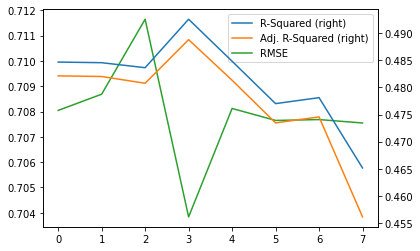

In [131]:
score_card.plot(secondary_y=['R-Squared','Adj. R-Squared'])
plt.show()

# Deployment